In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

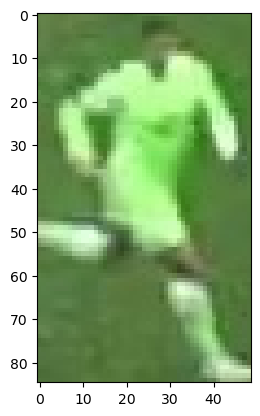

In [6]:
image_path = '../cropped_image.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## top half image

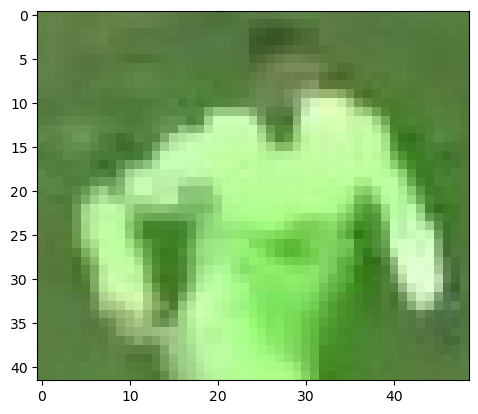

In [7]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# K-means Cluster 

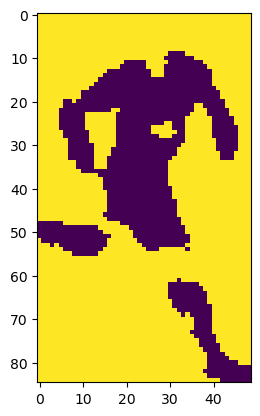

In [8]:
image_2d = image.reshape(-1, 3)

k_means = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = k_means.labels_

clustered_image = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(clustered_image)
plt.show()

## K means (half)

c:\Users\illuni_44\.conda\envs\soccer\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


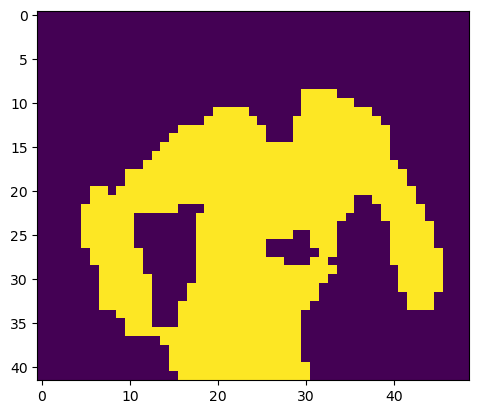

In [9]:
half_image_2d = top_half_image.reshape(-1, 3)

half_k_means = KMeans(n_clusters=2, random_state=0).fit(half_image_2d)

half_labels = half_k_means.labels_

half_clustered_image = half_labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(half_clustered_image)
plt.show()

In [ ]:
corner_clusters = [
    half_clustered_image[0, 0], half_clustered_image[0, -1],
    half_clustered_image[-1, 0], half_clustered_image[-1, -1]
    ]
print(corner_clusters)
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_clusters)